<a href="https://colab.research.google.com/github/fawziafaraag/Data-exploration-preporation/blob/main/Fawzia_faraag_DEP_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Import italy-covid-daywise.Csv which contains day-wise covid-19 data for italy.

In [ ]:
FILE_NAME = 'italy-covid-daywise.csv'
df = pd.read_csv(filepath_or_buffer=FILE_NAME, sep=',')

Retrieve the number of rows and columns in the data frame.

In [ ]:
print(f"[*] Count of Rows: {df.shape[0]}\n[*] Count of Columns: {df.shape[1]}")

[*] Count of Rows: 248
[*] Count of Columns: 4


View statistical information for numerical columns.

In [ ]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


View some basic information about the data frame like data types, and number of non-nulls.

In [ ]:
df.dtypes

date           object
new_cases     float64
new_deaths    float64
new_tests     float64
dtype: object

In [ ]:
df.notna().sum()

date          248
new_cases     248
new_deaths    248
new_tests     135
dtype: int64

Create a list of columns within the data frame.

In [ ]:
data_top = df.head(0)
for c in data_top:
    print(f"Column '{c}' content:\n{df[c].tolist()}")
    print('\n')

Column 'date' content:
['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-0

Return only the days which had more than 1000 reported cases.

In [ ]:
cases_count_thres = 1000
modified_df = df[['date', 'new_cases']].loc[df['new_cases'] > cases_count_thres]
modified_df

,date,new_cases
68,2020-03-08,1247.0
69,2020-03-09,1492.0
70,2020-03-10,1797.0
72,2020-03-12,2313.0
73,2020-03-13,2651.0
...,...,...
241,2020-08-28,1409.0
242,2020-08-29,1460.0
243,2020-08-30,1444.0
244,2020-08-31,1365.0


Create positive_rate column that is equal to new_cases / new_tests.

In [ ]:
df['positive_rate'] = df['new_cases'] / df['new_tests']
df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


Let's remove the positive_rate column·

In [ ]:
df.drop(columns='positive_rate', inplace=True)
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Sort to identify the days with the highest number of cases.

In [ ]:
desc_df = df.sort_values('new_cases',ascending=False)
desc_df

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


Check the data type of date column, then convert it into a datetime.

In [ ]:
print("Before:", df['date'].dtypes)
df['date']= pd.to_datetime(df['date'])
print("After:", df['date'].dtypes)

Before: object
After: datetime64[ns]


Extract different parts (day, month, weekday, and year) of the date column into separate columns.

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
print(df)

          date  new_cases  new_deaths  new_tests  year  month  day   day_name
0   2019-12-31        0.0         0.0        NaN  2019     12   31    Tuesday
1   2020-01-01        0.0         0.0        NaN  2020      1    1  Wednesday
2   2020-01-02        0.0         0.0        NaN  2020      1    2   Thursday
3   2020-01-03        0.0         0.0        NaN  2020      1    3     Friday
4   2020-01-04        0.0         0.0        NaN  2020      1    4   Saturday
..         ...        ...         ...        ...   ...    ...  ...        ...
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30     Sunday
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31     Monday
245 2020-09-01      996.0         6.0    54395.0  2020      9    1    Tuesday
246 2020-09-02      975.0         8.0        NaN  2020      9    2  Wednesday
247 2020-09-03     1326.0         6.0        NaN  2020      9    3   Thursday

[248 rows x 8 columns]


Check the overall metrics for may (I.E, the total numbers of 'new_cases', 'new_deaths', 'new_tests').

In [ ]:
month_tocheck = 5
modified_df = df[['new_cases', 'new_deaths', 'new_tests', 'month', 'year']].loc[df['month'] == month_tocheck]
modified_df.describe()

,new_cases,new_deaths,new_tests,month,year
count,31.000000,31.000000,31.000000,31.0,31.0
mean,937.838710,182.516129,34797.419355,5.0,2020.0
std,458.224843,91.088188,7403.552952,0.0,0.0
min,300.000000,50.000000,13665.000000,5.0,2020.0
25%,617.500000,118.000000,31307.500000,5.0,2020.0
50%,802.000000,165.000000,37049.000000,5.0,2020.0
75%,1274.000000,239.000000,40032.000000,5.0,2020.0
max,1965.000000,474.000000,45428.000000,5.0,2020.0


Which day seems like have more cases?.

In [ ]:
modified_df = df.groupby(df['date'].dt.day_name())['new_cases'].sum().sort_values()
modified_df.iloc[-1:]

date
Sunday    43654.0
Name: new_cases, dtype: float64

Create a new dataframe with month-wise data.

In [ ]:
df.groupby(df['date'].dt.strftime('%B'))['new_cases'].sum().sort_values()

date
December          0.0
January           3.0
February        885.0
September      3297.0
July           6722.0
June           7772.0
August        21060.0
May           29073.0
March        100851.0
April        101852.0
Name: new_cases, dtype: float64

Plot a line graph showing how the number of daily cases varies over time.

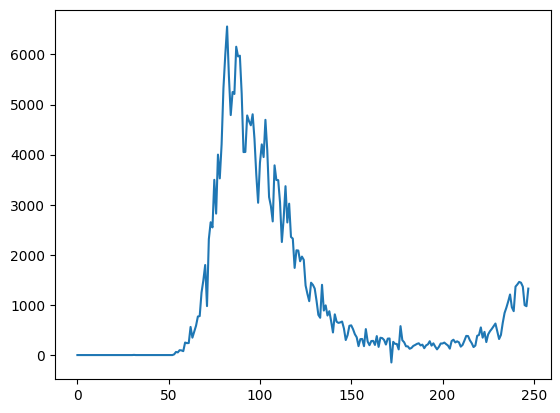

In [ ]:
lineplot = df['new_cases'].plot.line()